In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
os.chdir('datasets') # Set working directory

train = pd.read_csv("diamonds.csv")      # Read the data
train.shape

(53940, 10)

In [3]:
train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
pd.unique(train['clarity'])

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

#### One-way frequency table

In [5]:
my_tab = pd.crosstab(index=train["clarity"], columns='Count')
my_tab

col_0,Count
clarity,
I1,741
IF,1790
SI1,13065
SI2,9194
VS1,8171
VS2,12258
VVS1,3655
VVS2,5066


In [6]:
type(my_tab)

pandas.core.frame.DataFrame

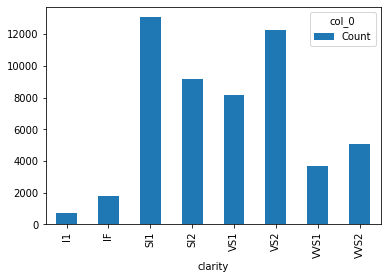

In [7]:
my_tab.plot.bar()

In [8]:
my_tab/my_tab.sum()

col_0,Count
clarity,
I1,0.013737
IF,0.033185
SI1,0.242214
SI2,0.170449
VS1,0.151483
VS2,0.227253
VVS1,0.067760
VVS2,0.093919


#### Two-way frequency table - Contingency table

In [10]:
clarity_color_table = pd.crosstab(index=train["clarity"], 
                          columns=train["color"])

clarity_color_table

color,D,E,F,G,H,I,J
clarity,,,,,,,
I1,42,102,143,150,162,92,50
IF,73,158,385,681,299,143,51
SI1,2083,2426,2131,1976,2275,1424,750
SI2,1370,1713,1609,1548,1563,912,479
VS1,705,1281,1364,2148,1169,962,542
VS2,1697,2470,2201,2347,1643,1169,731
VVS1,252,656,734,999,585,355,74
VVS2,553,991,975,1443,608,365,131


In [11]:
pd.crosstab(index=train["clarity"], columns=train["color"], margins= True)

color,D,E,F,G,H,I,J,All
clarity,,,,,,,,
I1,42,102,143,150,162,92,50,741
IF,73,158,385,681,299,143,51,1790
SI1,2083,2426,2131,1976,2275,1424,750,13065
SI2,1370,1713,1609,1548,1563,912,479,9194
VS1,705,1281,1364,2148,1169,962,542,8171
VS2,1697,2470,2201,2347,1643,1169,731,12258
VVS1,252,656,734,999,585,355,74,3655
VVS2,553,991,975,1443,608,365,131,5066
All,6775,9797,9542,11292,8304,5422,2808,53940


#### Chi Square Test

In [14]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(train["clarity"], train["color"]))[0:3]

(2047.0791639481313, 0.0, 42)

H0: There is no significant relationship between the variables<br/>
H1: There is significant relationship between the variables<br/>
As P<0.05, reject H0 -> There is some relationship between clarity and color